In [2]:
#conda-env-analysis3-20.01
import sys
sys.path.append('/g/data1a/e14/as3189/OFAM/scripts/')
import gsw
import numpy as np
import xarray as xr
from scipy import stats
from pathlib import Path
from scipy import interpolate
import matplotlib.pyplot as plt
from main import paths, idx_1d, LAT_DEG, lx, tao_data
from matplotlib.offsetbox import AnchoredText
import datetime

plt.rcParams.update({'font.size': 14})

In [3]:
# Path to save figures, save data and OFAM model output.
fpath, dpath, xpath, lpath = paths()
tpath = Path('/g', 'data', 'e14', 'as3189', 'OFAM', 'TAO')
lons = [165, 190, 220]
z1 = 50
z2 = 300
dt = xr.open_dataset(dpath.joinpath('ofam_ocean_u_EUC_int_transport.nc'))
dt = dt.sel(st_ocean=slice(z1, z2))
ds = tao_data(z1=z1, z2=z2)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [5]:
ds[0].u_1205.mean(axis=0)

<xarray.DataArray 'u_1205' (depth: 51)>
array([-0.00898245, -0.0032064 , -0.0012484 , -0.00260483, -0.00621349,
       -0.01174408, -0.01736432, -0.02203733, -0.02501711, -0.02298841,
       -0.01707505, -0.00454203,  0.01288523,  0.03642663,  0.06373782,
        0.09483462,  0.12799512,  0.16436143,  0.2021337 ,  0.24099581,
        0.2797216 ,  0.3185266 ,  0.35647926,  0.39174253,  0.42333916,
        0.44826078,  0.46867606,  0.48139244,  0.49029505,  0.49134645,
        0.48865494,  0.48010567,  0.467059  ,  0.45418456,  0.43308175,
        0.4106789 ,  0.38366526,  0.361206  ,  0.32944104,  0.30387333,
        0.28454453,  0.24522223,  0.213359  ,  0.17275532,  0.13124332,
        0.10995028,  0.09331542,  0.07831553,  0.04838086,  0.02242952,
        0.01107925], dtype=float32)
Coordinates:
    lat      float32 0.0
    lon      float32 165.0
  * depth    (depth) float32 50.0 55.0 60.0 65.0 ... 285.0 290.0 295.0 300.0

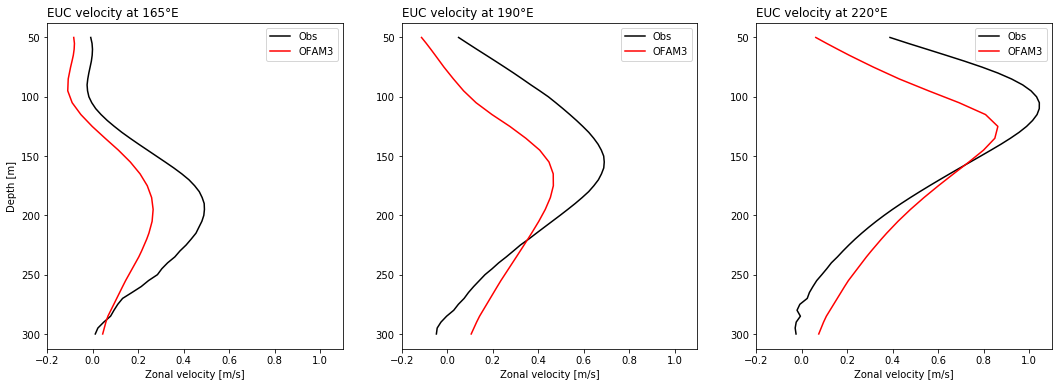

In [6]:

fig = plt.figure(figsize=(18, 6))
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1)
    ax.set_title('EUC velocity at {}°E'.format(lons[i]), loc='left')
    ax.plot(ds[i].u_1205.mean(axis=0), ds[i].depth, label='Obs', color='black')
    ax.plot(dt.sel(xu_ocean=lons[i]).mean(axis=0).u, ds[i].depth, label='OFAM3', color='red')
    plt.gca().invert_yaxis()
    ax.legend()
    ax.set_xlim(-0.2, 1.1)
    ax.set_xlabel('Zonal velocity [m/s]')
    if i == 0:
        ax.set_ylabel('Depth [m]')

plt.savefig(fpath.joinpath('EUC_TAO_velocity_depth_profile.png'))

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


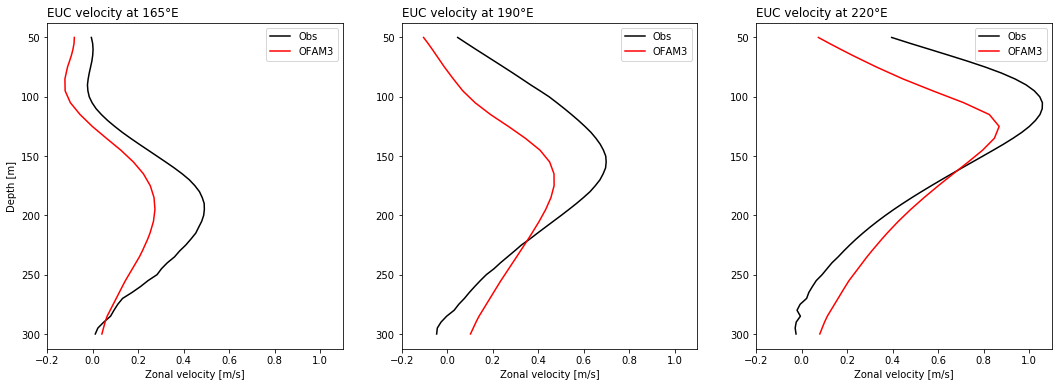

In [7]:
time_bnds_ofam = [[10*12+3, 27*12+1], [7*12+4, -1], [9*12+4, -1]]
time_bnds_tao = [[0, -1], [0, 24*12+8], [0, 22*12+8]]

fig = plt.figure(figsize=(18, 6))
for i, du in enumerate(ds):
    du = du.isel(time=slice(time_bnds_tao[i][0], time_bnds_tao[i][1]))

    ax = fig.add_subplot(1, 3, i+1)
    ax.set_title('EUC velocity at {}°E'.format(lons[i]), loc='left')
    ax.plot(du.u_1205.mean(axis=0), ds[i].depth, label='Obs', color='black')
    dtt = dt.sel(xu_ocean=lons[i]).isel(Time=slice(time_bnds_ofam[i][0], time_bnds_ofam[i][1]))
    dtt = dtt.where(np.isnan(du.u_1205.rename({'time': 'Time'}).mean(axis=1)) == False)
#     dtt.where(du.u_1205 )
    ax.plot(dtt.u.mean(axis=0), ds[i].depth, label='OFAM3', color='red')
    plt.gca().invert_yaxis()
    ax.legend()
    ax.set_xlim(-0.2, 1.1)
    ax.set_xlabel('Zonal velocity [m/s]')
    if i == 0:
        ax.set_ylabel('Depth [m]')

plt.savefig(fpath.joinpath('EUC_TAO_velocity_depth_profile_skip.png'))

In [8]:
dz = xr.open_dataset(xpath.joinpath('ocean_u_1981-2012_climo.nc')).mean('Time')
dz

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:     (st_ocean: 51, xu_ocean: 1750, yu_ocean: 300)
Coordinates:
  * xu_ocean    (xu_ocean) float64 120.0 120.1 120.2 120.3 ... 294.7 294.8 294.9
  * yu_ocean    (yu_ocean) float64 -15.0 -14.9 -14.8 -14.7 ... 14.7 14.8 14.9
  * st_ocean    (st_ocean) float64 2.5 7.5 12.5 ... 3.603e+03 4.509e+03
Data variables:
    average_DT  timedelta64[ns] 1 days
    u           (st_ocean, yu_ocean, xu_ocean) float32 0.02067629 ... 0.0009409874

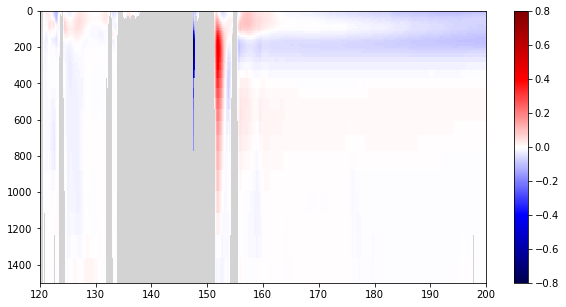

In [9]:
fig = plt.figure(figsize=(10, 5))
cmap = plt.get_cmap('seismic')
cmap.set_bad('lightgrey') 
im = plt.pcolormesh(dz.xu_ocean, dz.st_ocean, dz.u.isel(yu_ocean=91), cmap=cmap, vmax=.8, vmin=-.8)
plt.gca().invert_yaxis()
plt.ylim(1500, 0)
plt.xlim(120, 200)
plt.colorbar()

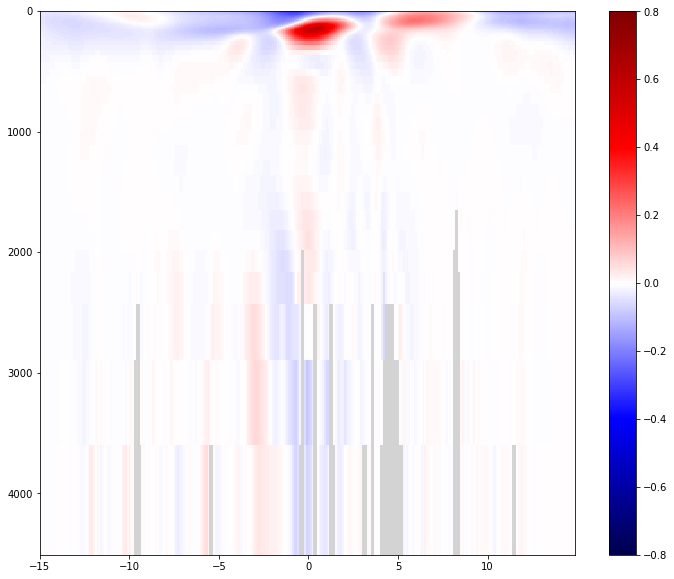

In [12]:
fig = plt.figure(figsize=(12, 10))
cmap = plt.get_cmap('seismic')
cmap.set_bad('lightgrey') 
im = plt.pcolormesh(dz.yu_ocean, dz.st_ocean, dz.u.sel(xu_ocean=200), cmap=cmap, vmax=.8, vmin=-.8)
plt.gca().invert_yaxis()
# plt.ylim(1500, 0)
plt.colorbar()